In [11]:
dir='/net/birdstore/Active_Atlas_Data/cell_segmentation/DK55'
!ls -lh $dir

total 730K
-rw-rw-r--   1 zhw272 dklab      51K Nov  9 10:24 average_cell_image.pkl
drwxrwsrwx 487 zhw272 dklab      487 Oct  6 15:22 CH1
drwxrwsrwx 487 zhw272 dklab      487 Oct 25 16:33 CH3
-rw-r--r--   1 zhw272 birdstore 830K Dec 17 17:59 detections_DK55.2.csv
-rw-rw-r--   1 zhw272 dklab      358 Oct 25 11:37 tile_info.csv


In [12]:
import pickle as pk
from collections import Counter
missed=pk.load(open('computerMissed.pkl','rb'))
#[m[1]['section'] for m in missed]
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/share/pipeline/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['diff']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [23]:
#%%time
extracted={}
misses=[]
i=0
distances = []
for m in missed:
    # print('\r %d'%i,end='')
    i+=1
    x=m[1]['x']; y=m[1]['y']
    point=array([[x,y]])
    section=int(m[1]['section'])

    if section in extracted:
        locs=extracted[section]
    else:
        extracted_file= dir+'/CH3/%s/extracted_cells_%s.pkl'%(section,section)
        ext=pk.load(open(extracted_file,'rb'))
        all_examples=[]
        for example in ext['Examples']:
            all_examples+=example

        locs=[]
        for example in all_examples:
            origin_row,origin_col = example['origin']
            row=example['row']+origin_row
            col=example['col']+origin_col
            locs.append((row,col))
        locs=stack(locs)
        extracted[section]=locs
 
    diff=locs-point
    #print(point.shape,locs.shape,diff.shape)
    dist=sqrt(sum(diff*diff,axis=1))
    closest=argmin(dist)
    # if dist[closest]<500:
    distances.append(dist[closest])

    ex=all_examples[closest]
    
    misses.append({'point':point,
                'distance':dist[closest],
                'details':ex})

In [17]:
plt.hist(distances)

dict_keys(['animal', 'section', 'index', 'label', 'area', 'row', 'col', 'origin', 'height', 'width', 'image_CH3', 'image_CH1'])

In [21]:
figure(figsize=[100,600])
for i in range(300): #len(misses)):
    subplot(60,10,2*i+1)
    imshow(misses[i]['details']['image_CH1'],cmap='gray')
    subplot(60,10,2*i+2)
    imshow(misses[i]['details']['image_CH3'],cmap='gray')

<Figure size 7200x43200 with 0 Axes>

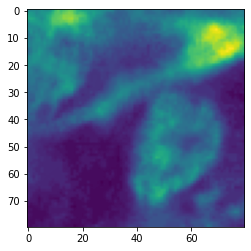

In [35]:
imshow(ex['image_CH1'])